In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
os.getcwd()

'/home/schnemau/xAI_stroke_3d'

In [2]:
dir = "/home/schnemau/xAI_stroke_3d/data/"
sigmoid = pd.read_csv(dir + "all_tab_results_10Fold_sigmoid_V0_M1.csv")
cib = pd.read_csv(dir + "all_tab_results_10Fold_CIB_M1.csv")
ciblsx = pd.read_csv(dir + "all_tab_results_10Fold_CIBLSX_M1_dyn_threshold.csv")

## Comparison of class 1 probabilities

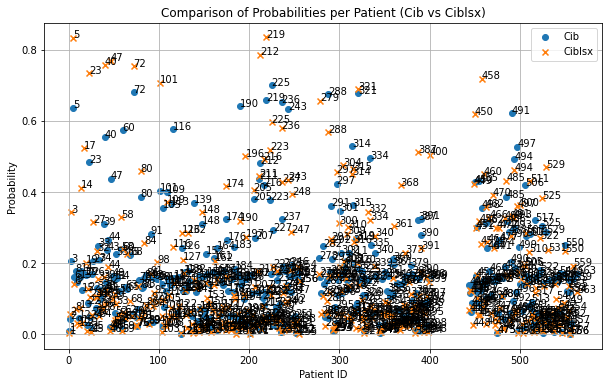

In [3]:
# Merge dataframes on 'p_id'
merged_df = pd.merge(cib, ciblsx, on='p_id', suffixes=('_cib', '_ciblsx'))

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for cib with patient IDs
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['p_id'][i], merged_df['y_pred_trafo_avg_cib'][i]))

plt.scatter(merged_df['p_id'], merged_df['y_pred_trafo_avg_cib'], label='Cib', marker='o')

# Scatter plot for ciblsx with patient IDs
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['p_id'][i], merged_df['y_pred_trafo_avg_ciblsx'][i]))

plt.scatter(merged_df['p_id'], merged_df['y_pred_trafo_avg_ciblsx'], label='Ciblsx', marker='x')

plt.title('Comparison of Probabilities per Patient (Cib vs Ciblsx)')
plt.xlabel('Patient ID')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


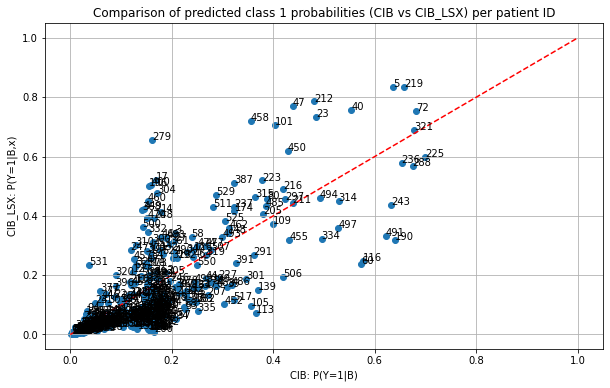

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['y_pred_trafo_avg_cib'], merged_df['y_pred_trafo_avg_ciblsx'], label='Cib vs Ciblsx', marker='o')

# Add the 90-degree line in red
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title('Comparison of predicted class 1 probabilities (CIB vs CIB_LSX) per patient ID')
plt.xlabel('CIB: P(Y=1|B)')
plt.ylabel('CIB_LSX: P(Y=1|B,x)')

# Add patient IDs to the points
for i, txt in enumerate(merged_df['p_id']):
    plt.annotate(txt, (merged_df['y_pred_trafo_avg_cib'][i], merged_df['y_pred_trafo_avg_ciblsx'][i]))

plt.grid(True)
plt.show()
plt.savefig(dir + "scatter.png", facecolor='w')



## Comparison of classification results

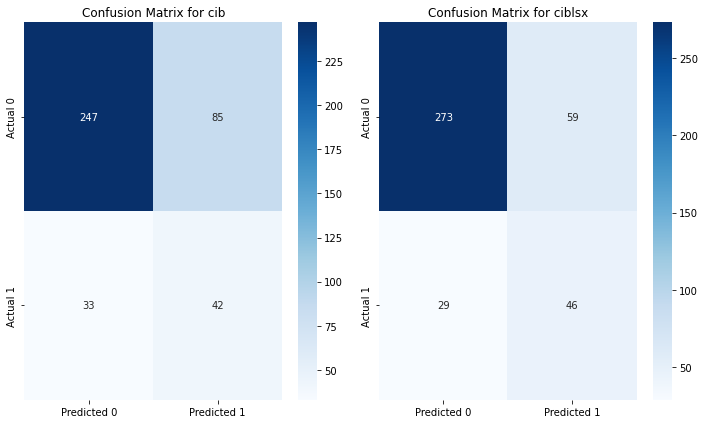

In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have two dataframes: cib and ciblsx

# Confusion Matrix for cib
conf_matrix_cib = confusion_matrix(cib['unfavorable'], cib['y_pred_class'])

# Confusion Matrix for ciblsx
conf_matrix_ciblsx = confusion_matrix(ciblsx['unfavorable'], ciblsx['y_pred_class'])

# Plotting for cib
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_cib, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for cib')

# Plotting for ciblsx
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_ciblsx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for ciblsx')

plt.tight_layout()
plt.show()


In [11]:
# Zusammenführen der Dataframes basierend auf 'p_id'
merged_df = pd.merge(cib, ciblsx, on='p_id', suffixes=('_cib', '_ciblsx'))

# Erstellen der Kreuztabelle
cross_tab = pd.crosstab(merged_df['y_pred_class_cib'], merged_df['y_pred_class_ciblsx'], margins=True, margins_name="Total")

# Prozentuale Anteile berechnen
cross_tab_percent = cross_tab / cross_tab.loc["Total", "Total"] * 100

# Ausgabe der Kreuztabelle
print("Cross-tabulation of Predicted Classes:")
print(cross_tab)
print("\nCross-tabulation of Predicted Classes (Percentage):")
print(cross_tab_percent)


Cross-tabulation of Predicted Classes:
y_pred_class_ciblsx    0    1  Total
y_pred_class_cib                    
0                    241   39    280
1                     61   66    127
Total                302  105    407

Cross-tabulation of Predicted Classes (Percentage):
y_pred_class_ciblsx          0          1       Total
y_pred_class_cib                                     
0                    59.213759   9.582310   68.796069
1                    14.987715  16.216216   31.203931
Total                74.201474  25.798526  100.000000


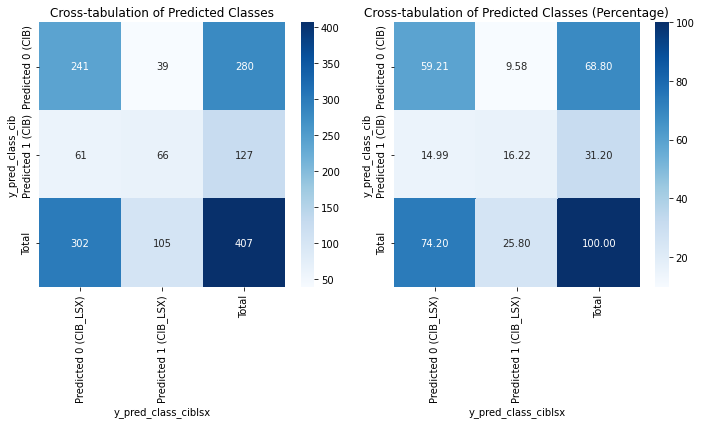

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_df DataFrame from the previous code

# Create a cross-tabulation
cross_tab = pd.crosstab(merged_df['y_pred_class_cib'], merged_df['y_pred_class_ciblsx'], margins=True, margins_name="Total")

# Calculate percentages
cross_tab_percent = cross_tab / cross_tab.loc["Total", "Total"] * 100

# Plotting
plt.figure(figsize=(10, 6))

# Heatmap for cross-tabulation
plt.subplot(1, 2, 1)
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (CIB_LSX)', 'Predicted 1 (CIB_LSX)', 'Total'],
            yticklabels=['Predicted 0 (CIB)', 'Predicted 1 (CIB)', 'Total'])
plt.title('Cross-tabulation of Predicted Classes')

# Heatmap for percentages
plt.subplot(1, 2, 2)
sns.heatmap(cross_tab_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Predicted 0 (CIB_LSX)', 'Predicted 1 (CIB_LSX)', 'Total'],
            yticklabels=['Predicted 0 (CIB)', 'Predicted 1 (CIB)', 'Total'])
plt.title('Cross-tabulation of Predicted Classes (Percentage)')

plt.tight_layout()
plt.show()

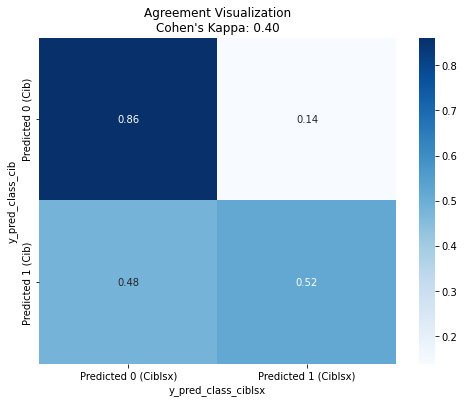

Cohen's Kappa: 0.40


In [29]:
from sklearn.metrics import cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_df DataFrame from the previous code

# Calculate Cohen's Kappa
kappa_score = cohen_kappa_score(merged_df['y_pred_class_cib'], merged_df['y_pred_class_ciblsx'])

# Visualize the agreement
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(merged_df['y_pred_class_cib'], merged_df['y_pred_class_ciblsx'], normalize='index'),
            annot=True, cmap='Blues', fmt=".2f",
            xticklabels=['Predicted 0 (Ciblsx)', 'Predicted 1 (Ciblsx)'],
            yticklabels=['Predicted 0 (Cib)', 'Predicted 1 (Cib)'])
plt.title(f'Agreement Visualization\nCohen\'s Kappa: {kappa_score:.2f}')
plt.show()

print(f"Cohen's Kappa: {kappa_score:.2f}")
